# Plot of base population grids

Plot the population distribution in 2000 and the change in 2015 relative to 2000

In [2]:
%matplotlib inline

from pathlib import Path
from datetime import date

import rasterio
import numpy as np
import scipy as sp
import pandas as pd
import xarray as xr
import geopandas as gpd 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy import stats
from affine import Affine

import weather_ecmwf
import population_tools

from config import (DATA_SRC, ERA_MONTHLY_FILE, 
                    CLIMATOLOGY_FILE_MONTHLY, POP_DATA_SRC)



In [4]:
with population_tools.PopulationProjector('population_count_2000-2020.nc', mask_empty=True) as pop:
    first_year = pop.data.population.sel(time='2000').load().squeeze()
    final_year = pop.data.population.sel(time='2015').load().squeeze() 

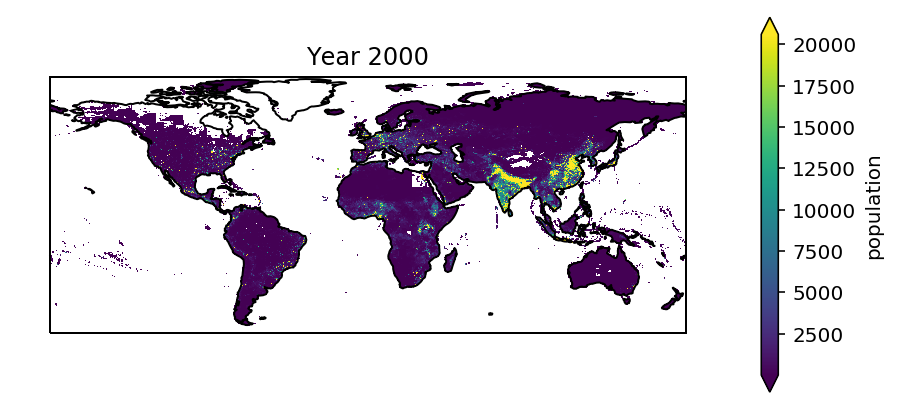

In [36]:
f = plt.figure()
f.set_size_inches(6.5,3)
ax = plt.axes(projection=ccrs.PlateCarree())
first_year.plot.pcolormesh(robust=True, ax=ax,
                transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('Year 2000')
plt.tight_layout()
plt.show()
f.savefig('year_2000_population.png', dpi=1000, bbox_inches='tight')

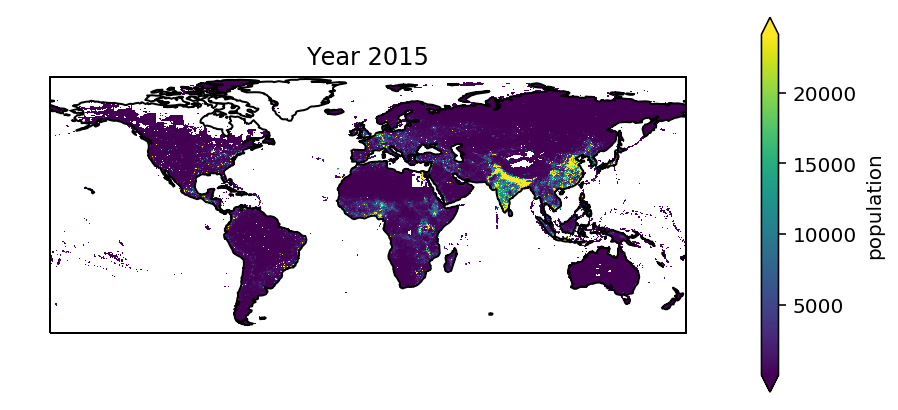

In [37]:
f = plt.figure()
f.set_size_inches(6.5,3)
ax = plt.axes(projection=ccrs.PlateCarree())
final_year.plot(robust=True, ax=ax,
                transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('Year 2015')
plt.tight_layout()
plt.show()
f.savefig('year_2015_population.png', dpi=1000, bbox_inches='tight')

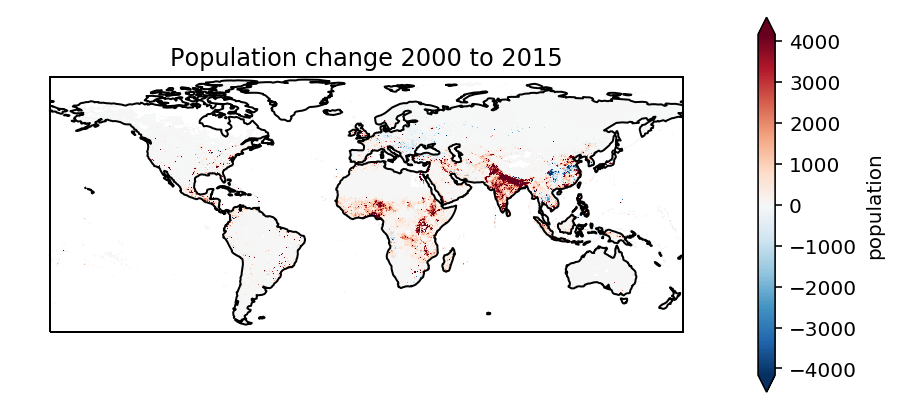

In [38]:
pop_delta = final_year - first_year
pop_delta.name = 'Change in population'


f = plt.figure()
f.set_size_inches(6.5,3)
ax = plt.axes(projection=ccrs.PlateCarree())
pop_delta.plot(robust=True, ax=ax,
                transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('Population change 2000 to 2015')
plt.tight_layout()
plt.show()
f.savefig('2000-2015_population_change.png', dpi=1000, bbox_inches='tight')

In [3]:
with population_tools.PopulationProjector('population_density_2000-2020.nc', mask_empty=True) as pop:
    first_year = pop.data.population.sel(time='2000').load().squeeze()
    final_year = pop.data.population.sel(time='2015').load().squeeze() 

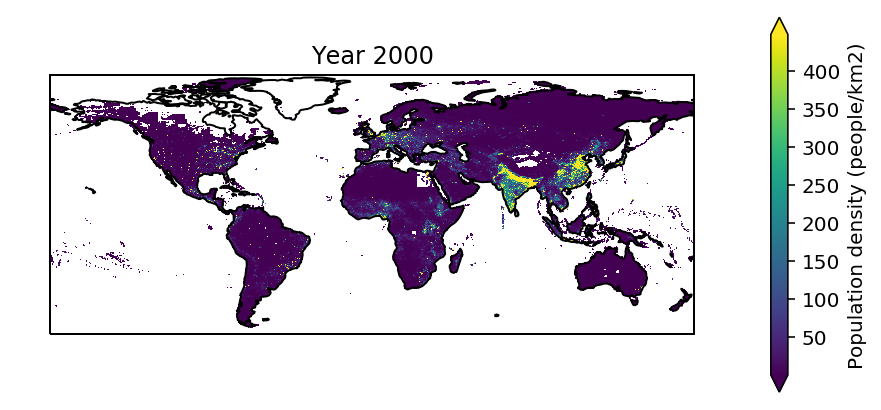

In [8]:
f = plt.figure()
f.set_size_inches(6.5,3)
ax = plt.axes(projection=ccrs.PlateCarree())

first_year.name = 'Population density (people/km2)'
first_year.plot.pcolormesh(robust=True, ax=ax,
                transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('Year 2000')
plt.tight_layout()
plt.show()
f.savefig('year_2000_population_density.png', dpi=1000, bbox_inches='tight')

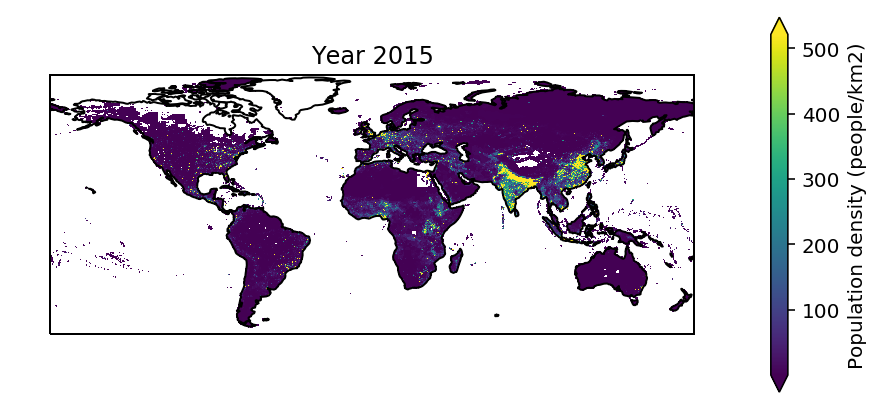

In [9]:
f = plt.figure()
f.set_size_inches(6.5,3)
ax = plt.axes(projection=ccrs.PlateCarree())
final_year.name = 'Population density (people/km2)'


final_year.plot(robust=True, ax=ax,
                transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('Year 2015')
plt.tight_layout()
plt.show()
f.savefig('year_2015_population_density.png', dpi=1000, bbox_inches='tight')

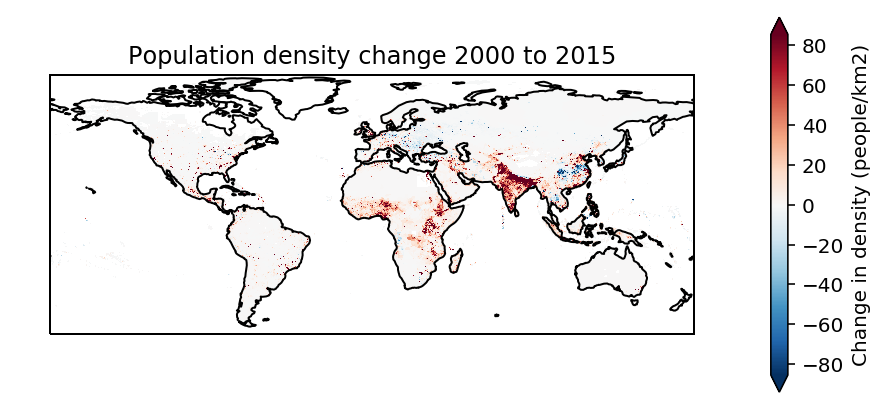

In [5]:
pop_delta = final_year - first_year
pop_delta.name = 'Change in density (people/km2)'
f = plt.figure()
f.set_size_inches(6.5,3)
ax = plt.axes(projection=ccrs.PlateCarree())
pop_delta.plot(robust=True, ax=ax,
                transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('Population density change 2000 to 2015')
plt.tight_layout()
plt.show()
f.savefig('2000-2015_population_density_change.png', dpi=1000, bbox_inches='tight')